Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
import sklearn.metrics as skmetrics
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, roc_auc_score

Loading and displaying the dataset

In [ ]:
# given by the dataset
column_names = [
    "Mean_Integrated_Profile", "Std_Integrated_Profile", "Kurtosis_Integrated_Profile", "Skewness_Integrated_Profile",
    "Mean_DM_SNR", "Std_DM_SNR", "Kurtosis_DM_SNR", "Skewness_DM_SNR", "Class"
]

df = pd.read_csv("/content/HTRU_2.csv", names=column_names)
df.head()

,Mean_Integrated_Profile,Std_Integrated_Profile,Kurtosis_Integrated_Profile,Skewness_Integrated_Profile,Mean_DM_SNR,Std_DM_SNR,Kurtosis_DM_SNR,Skewness_DM_SNR,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Visualization using PCA (No Reconstruction)

In [ ]:
class PrincipalComponentAnalysis(object):

    def __init__(self, d):
        # Number of eigenvectors to keep
        self.__d = d

        # Mean of the dataset
        self.__mean = None

        # Linear weights or transformation to project to lower subspace
        self.__weights = None

        # Eigenvalues of the dataset
        self.__eigenvalues = None

    def __center(self, X):
        '''
        Centers the data to zero-mean

        Args:
            X : numpy[float32]
                N x D feature vectors
        Returns:
            numpy[float32] : N x D centered feature vectors
        '''

        # TODO: Center the data
        self.__mean = np.mean(X, axis=0)

        return X - self.__mean

    def __covariance_matrix(self, X):
        '''
        Computes the covariance matrix of feature vectors

        Args:
            X : numpy[float32]
                N x D feature vectors
        Returns:
            numpy[float32] : D x D covariance matrix
        '''

        # TODO: Compute the covariance matrix
        N = X.shape[0]
        B = self.__center(X)

        return (1 / (N - 1)) * B.T @ B

    def fit(self, X):
        '''
        Obtains the top d eigenvectors (weights) from the input feature vectors

        Arg(s):
            X : numpy[float32]
                N x D feature vector
        '''

        # TODO: Implement the fit function

        # Make sure that d is less or equal D
        assert self.__d <= X.shape[1]

        # TODO: Compute mean
        self.__mean = np.mean(X, axis=0)

        # TODO: Compute the covariance matrix
        cov_matrix = self.__covariance_matrix(X)

        # TODO: Eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        idx = np.argsort(eigenvalues)[::-1]

        # TODO: Store the top d eigenvalues
        self.__eigenvalues = eigenvalues[idx][:self.__d]

        # TODO: Store the top d eigenvectors
        self.__weights = eigenvectors[:, idx][:, :self.__d]
    def project_to_subspace(self, X):
      '''
      Project data X to lower dimension subspace using the top d eigenvectors

      Arg(s):
          X : numpy[float32]
              N x D feature vectors
      Returns:
          numpy[float32] : N x d feature vectors
      '''

      # TODO: Computes transformation to lower dimension and project to subspace
      centered_X = X - self.__mean

      return centered_X @ self.__weights

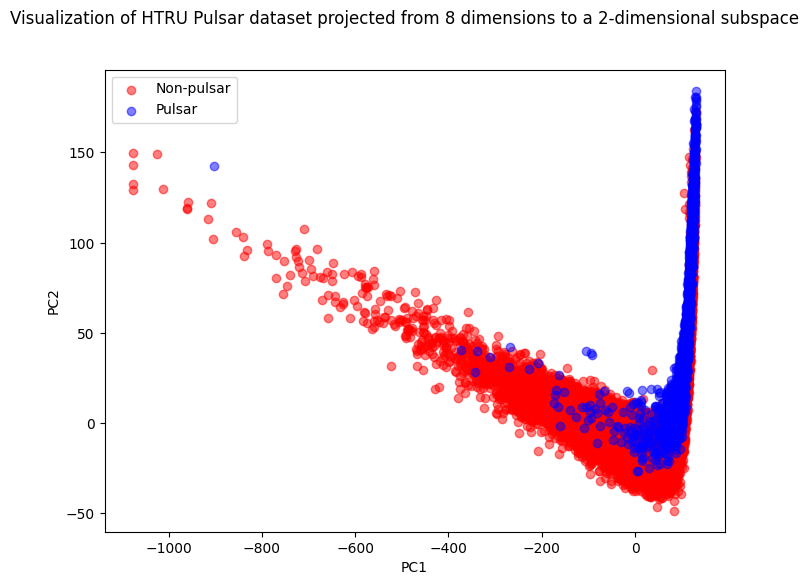

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
colors = ['red', 'blue']
names = ['Non-pulsar', 'Pulsar']
n_dim = X.shape[-1]

# TODO: Instantiate PCA with 2 components (dimensions)
pca = PrincipalComponentAnalysis(d=2)

# TODO: Fit PCA to data
pca.fit(X)

# TODO: Use PCA to project (transform) all data points to lower dimensions
Z = pca.project_to_subspace(X)

# TODO: Create figure
fig = plt.figure(figsize=(8, 6))

# TODO: Create super title 'Visualization of {} dataset projected from {} dimensions to a 2-dimensional subspace'
fig.suptitle('Visualization of {} dataset projected from {} dimensions to a 2-dimensional subspace'.format('HTRU Pulsar', n_dim))

# TODO: Instantiate axis for subplot of a 1 x 1 figure
ax = fig.add_subplot(1, 1, 1)

# Iterate through each class and plot them into the figure as scatter plot with different colors
for label, color, name in zip(np.sort(np.unique(y)), colors, names):

    # TODO: Select from projected points the ones belonging to current class
    idx = y == label
    Z_label = Z[idx]

    # TODO: Plot using scatter for selected points with associated color
    # set the points label as name, set alpha to 0.5
    ax.scatter(Z_label[0], Z_label[1], c=color, label=name, alpha=0.5)

# TODO: Turn on legend and set loc to best
ax.legend(loc='best')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.show()

Initial Binary Perceptron (Adapted from PSET1)

In [ ]:
class BinaryPerceptron:
    '''
    Implementation of Binary Perceptron
    '''

    def __init__(self):
        self.__weights = None

    def __update(self, x, y):
        '''
        Update weights for misclassified examples

        Arg(s):
            x : numpy.ndarray
                Feature vector of shape d x 1
            y : int
                Label/target (-1 or 1)
        '''

        # TODO: Implement weight update rule for binary perceptron
        self.__weights += y * x


    def fit(self, x, y, max_iter=100):
        '''
        Fit the binary perceptron to training data

        Arg(s):
            x : numpy.ndarray
                Features of shape d x N
            y : numpy.ndarray
                Labels/targets of shape 1 x N
            max_iter : int
                Maximum number of iterations
        '''

        n_features, n_samples = x.shape

        # Initialize weights (including a bias term, w0) as zeros vector with shape d+1 x 1
        self.__weights = np.zeros((n_features + 1, 1))

        # Append artificial coordinate (x0) to the data
        x = np.vstack((np.ones((1, n_samples)), x))

        # Implement training loop
        for _ in range(max_iter):
            n_updates = 0

            # Process each sample
            for n in range(n_samples):
                # TODO: Calculate prediction
                x_n = x[:, n].reshape(-1, 1)
                y_hat = np.sign(np.matmul(self.__weights.T, x_n))

                # TODO: Update weights if misclassified
                if y_hat != y[0, n]:
                  self.__update(x_n, y[0, n])
                  n_updates +=1

            # Break if no updates were made, e.g., check for convergence
            if n_updates == 0:
              break


    def predict(self, x):
        '''
        Make predictions

        Arg(s):
            x : numpy.ndarray
                Features of shape d x N

        Returns:
            numpy.ndarray : Predicted labels (-1 or 1) of 1 x N
        '''

        n_features, n_samples = x.shape

        # Append artificial coordinate (x0) to the data
        x = np.vstack((np.ones((1, n_samples)), x))

        # Implement prediction logic
        return np.sign(np.matmul(self.__weights.T, x))

    def score(self, x, y):
        '''
        Calculate prediction accuracy

        Arg(s):
            x : numpy.ndarray
                Features of shaped d x N
            y : numpy.ndarray
                Labels/targets of shape 1 x N

        Returns:
            float: Accuracy score
        '''

        # Implement accuracy calculation
        y_hat = self.predict(x)
        return np.mean(y_hat == y)

Preparation of Dataset (Adapted from PSET1)

In [ ]:
def prepare_data_for_binary_perceptron(df):
  '''
  Prepare binary classification dataset from digits

  Args:
      df: the HTRU dataset as a dataframe

  Returns:
      tuple: (X_train, y_train, X_val, y_val, X_test, y_test)
          X_train : d x N
          y_train : 1 x N
          X_val : d x M
          y_val : 1 x M
          X_test : d x P
          y_test : 1 x P
  '''

  # extract data from dataframe
  X = df.iloc[:, :-1].values
  y = df.iloc[:, -1].values

  # convert labels to -1/1
  y = np.where(y == 0, -1, 1)
  y = np.expand_dims(y, axis=-1)

  # use scikit test_train_split to create training, validation, and testing splits
  X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
  X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

  # transpose resulting matrices into expected d x N
  X_train, X_val, X_test = X_train.T, X_val.T, X_test.T
  y_train, y_val, y_test = y_train.T, y_val.T, y_test.T

  return X_train, y_train, X_val, y_val, X_test, y_test

Testing Binary Perceptron with max_iters 10, 50, 100

Max iterations: 10, Validation accuracy: 0.9773
Model test accuracy: 0.9799
Max iterations: 50, Validation accuracy: 0.9762
Model test accuracy: 0.9762
Max iterations: 100, Validation accuracy: 0.9624
Model test accuracy: 0.9616


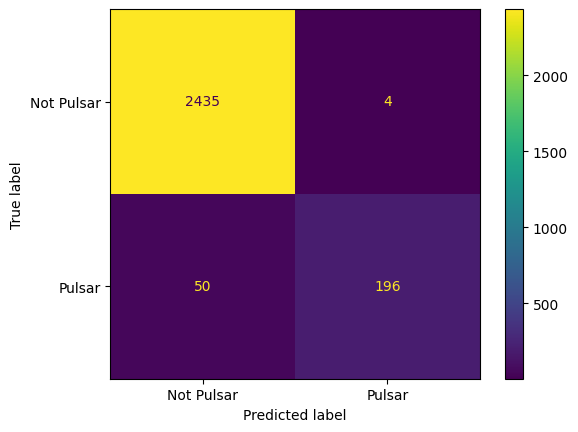

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = prepare_data_for_binary_perceptron(df)
max_iters = [10, 50, 100]
best_val_score = 0
best_model = None

for max_iter in max_iters:
    # TODO: Initialize and train binary perceptron
    model = BinaryPerceptron()
    model.fit(x=X_train, y=y_train, max_iter=max_iter)

    # TODO: Calculate validation score
    val_score = model.score(X_val, y_val)
    print("Max iterations: {}, Validation accuracy: {:.4f}".format(max_iter, val_score))

    # test model
    test_score = model.score(X_test, y_test)
    print("Model test accuracy: {:.4f}".format(test_score))

    # TODO: Update best_model if current model performs better
    if val_score > best_val_score:
      best_val_score = val_score
      best_model = model


# create a confusion matrix using skmetrics.confusion_matrix for your model on the test set
predictions_test = best_model.predict(X_test)
confusion_matrix = skmetrics.confusion_matrix(y_test.T, predictions_test.T)
confusion_matrix_plot = skmetrics.ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix,
        display_labels=["Not Pulsar", "Pulsar"]).plot()

# Show confusion matrix
plt.show()

Implementation of Gradient Descent Optimizer (Adapted from PSET 2)

In [ ]:
class Optimizer(object):

    def __init__(self, alpha, eta_decay_factor, beta, optimizer_type):
        '''
        Arg(s):
            alpha : float
                initial learning rate
            eta_decay_factor : float
                learning rate decay rate
            beta : float
                momentum discount rate
            optimizer_type : str
                'gradient_descent',
                'momentum_gradient_descent',
                'stochastic_gradient_descent',
                'momentum_stochastic_gradient_descent'
        '''

        self.__alpha = alpha
        self.__eta_decay_factor = eta_decay_factor
        self.__beta = beta
        self.__optimizer_type = optimizer_type
        self.__momentum = None

    def __compute_gradients(self, w, x, y, loss_func='logistic'):
        '''
        Returns the gradient of a loss function

        Arg(s):
            w : numpy[float32]
                d x 1 weight vector
            x : numpy[float32]
                d x N feature vector
            y : numpy[float32]
                1 x N groundtruth vector
            loss_func : str
                loss by default is 'logistic' only for the purpose of the assignment
        Returns:
            numpy[float32] : d x 1 gradients
        '''

        # TODO: Implement compute_gradient function

        if loss_func == 'logistic':

            y_hat = np.matmul(w.T, x)

            gradient = -(np.matmul(x, (y / (1 + np.exp(y * y_hat))).T) / x.shape[1])

            return gradient

        else:
            raise ValueError('Unupported loss function: {}'.format(loss_func))

    def __polynomial_decay(self, time_step):
        '''
        Computes the polynomial decay factor t^{-a}

        Arg(s):
            time_step : int
                current step in optimization
        Returns:
            float : polynomial decay to adjust (reduce) initial learning rate
        '''

        # TODO: Implement polynomial decay to adjust the initial learning rate

        return time_step ** -self.__eta_decay_factor

    def update(self,
               w,
               x,
               y,
               loss_func,
               batch_size,
               time_step):
        '''
        Updates the weight vector based on

        Arg(s):
            w : numpy[float32]
                d x 1 weight vector
            x : numpy[float32]
                d x N feature vector
            y : numpy[float32]
                1 x N groundtruth vector
            loss_func : str
                loss function to use, should be 'logistic' for the purpose of the assignment
            batch_size : int
                batch size for stochastic and momentum stochastic gradient descent
            time_step : int
                current step in optimization
        Returns:
            numpy[float32]: d x 1 weights
        '''

        # TODO: Implement the optimizer update function
        # For each optimizer type, compute gradients and update weights

        if self.__optimizer_type == 'gradient_descent':

            gradients = self.__compute_gradients(w, x, y, loss_func)

            return w - self.__alpha * gradients

        elif self.__optimizer_type == 'momentum_gradient_descent':

            gradients = self.__compute_gradients(w, x, y, loss_func)

            if self.__momentum is None:
              self.__momentum = np.zeros(w.shape)
            self.__momentum = self.__beta * self.__momentum + (1 - self.__beta) * gradients

            return w - self.__alpha * gradients

        elif self.__optimizer_type == 'stochastic_gradient_descent':

            random_indices = np.random.permutation(x.shape[1])
            batch_indicies = random_indices[:batch_size]

            x_batch = x[:, batch_indicies]
            y_batch = y[:, batch_indicies]

            gradients = self.__compute_gradients(w, x_batch, y_batch, loss_func)

            return w - self.__alpha * self.__polynomial_decay(time_step) * gradients

        elif self.__optimizer_type == 'momentum_stochastic_gradient_descent':

            random_indices = np.random.permutation(x.shape[1])
            batch_indicies = random_indices[:batch_size]

            x_batch = x[:, batch_indicies]
            y_batch = y[:, batch_indicies]

            gradients = self.__compute_gradients(w, x_batch, y_batch, loss_func)

            if self.__momentum is None:
              self.__momentum = np.zeros(w.shape)
            self.__momentum = self.__beta * self.__momentum + (1 - self.__beta) * gradients

            return w - self.__alpha * self.__polynomial_decay(time_step) * gradients

        else:
            raise ValueError('Unsupported optimizer type: {}'.format(self.__optimizer_type))

Implementation of Logistic Regressor with Option for Gradient Descent Type (Adapted from PSET2)

In [ ]:
class LogisticRegression(object):

    def __init__(self):
        # Define private variables
        self.__weights = None
        self.__optimizer = None

    def fit(self,
            x,
            y,
            T,
            alpha,
            eta_decay_factor,
            beta,
            batch_size,
            optimizer_type,
            loss_func='logistic',
            display_loss = True):
        '''
        Fits the model to x and y by updating the weight vector
        using gradient descent

        Arg(s):
            x : numpy[float32]
                d x N feature vector
            y : numpy[float32]
                1 x N groundtruth vector
            T : int
                number of iterations to train
            alpha : float
                learning rate
            eta_decay_factor : float
                learning rate decay rate
            beta : float
                momentum discount rate
            batch_size : int
                number of examples per batch
            optimizer_type : str
                'gradient_descent',
                'momentum_gradient_descent',
                'stochastic_gradient_descent',
                'momentum_stochastic_gradient_descent'
            loss_func : str
                loss function to use, by default is 'logistic' only for the purpose of the assignment
        '''

        # TODO: Instantiate optimizer and weights
        self.__optimizer = Optimizer(alpha, eta_decay_factor, beta, optimizer_type)
        self.__weights = np.zeros(x.shape[0])

        for t in range(1, T + 1):

            # TODO: Compute loss function
            loss = self.__compute_loss(x, y, loss_func)

            if display_loss:
              if (t % 500) == 0:
                  print('Step={}  Loss={}'.format(t, loss))

            # TODO: Update weights
            self.__weights = self.__optimizer.update(self.__weights, x, y, loss_func, batch_size, t)


    def predict(self, x):
        '''
        Predicts the label for each feature vector x

        Arg(s):
            x : numpy[float32]
                d x N feature vector
        Returns:
            numpy[float32] : 1 x N vector
        '''

        # TODO: Implements the predict function
        # Hint: logistic regression predicts a value between 0 and 1

        predictions = 1 / (1 + np.exp(-np.matmul(self.__weights.T, x)))
        labels = np.where(predictions >= 0.5, 1, -1)

        return labels

    def predict_proba(self, x):
      '''
      Returns the predicted probability (sigmoid output) for each input vector.

      Arg(s):
          x : numpy[float32]
              d x N feature vector
      Returns:
          numpy[float32] : 1 x N probabilities between 0 and 1
      '''
      return 1 / (1 + np.exp(-np.matmul(self.__weights.T, x)))

    def __compute_loss(self, x, y, loss_func):
        '''
        Computes the logistic loss

        Arg(s):
            x : numpy[float32]
                d x N feature vector
            y : numpy[float32]
                1 x N groundtruth vector
            loss_func : str
                loss function to use, by default is 'logistic' only for the purpose of the assignment
        Returns:
            float : loss
        '''

        # TODO: Implements the __compute_loss function

        if loss_func == 'logistic':
            y_hat = np.matmul(self.__weights.T, x)
            loss = np.mean(np.log(1 + np.exp(-y * y_hat)))
        else:
            raise ValueError('Unsupported loss function: {}'.format(loss_func))

        return loss

Testing Logistic Regression with Each Optimizer

***** Results of our logistic regression model trained on HTRU Pulsar dataset *****
	 optimizer_type=gradient_descent 
	 alpha=0.0001 
	 eta_decay_factor=None 
	 beta=None 
	 batch_size=None 
	 T=10000

Step=500  Loss=0.12334488849088804
Step=1000  Loss=0.11215798581433868
Step=1500  Loss=0.10704081523961112
Step=2000  Loss=0.10415074806385917
Step=2500  Loss=0.10231140701648489
Step=3000  Loss=0.10104109684028958
Step=3500  Loss=0.1001084601775445
Step=4000  Loss=0.09939018439966367
Step=4500  Loss=0.09881542977178193
Step=5000  Loss=0.09834108245934445
Step=5500  Loss=0.09793964600880532
Step=6000  Loss=0.09759287953299096
Step=6500  Loss=0.09728826254921344
Step=7000  Loss=0.0970169388548195
Step=7500  Loss=0.09677247404254292
Step=8000  Loss=0.09655007960690605
Step=8500  Loss=0.09634611422688233
Step=9000  Loss=0.09615775480697061
Step=9500  Loss=0.0959827743235256
Step=10000  Loss=0.09581938850978816
Total training time: 107.922665 seconds

Training set mean accuracy: 0.9699
Vali

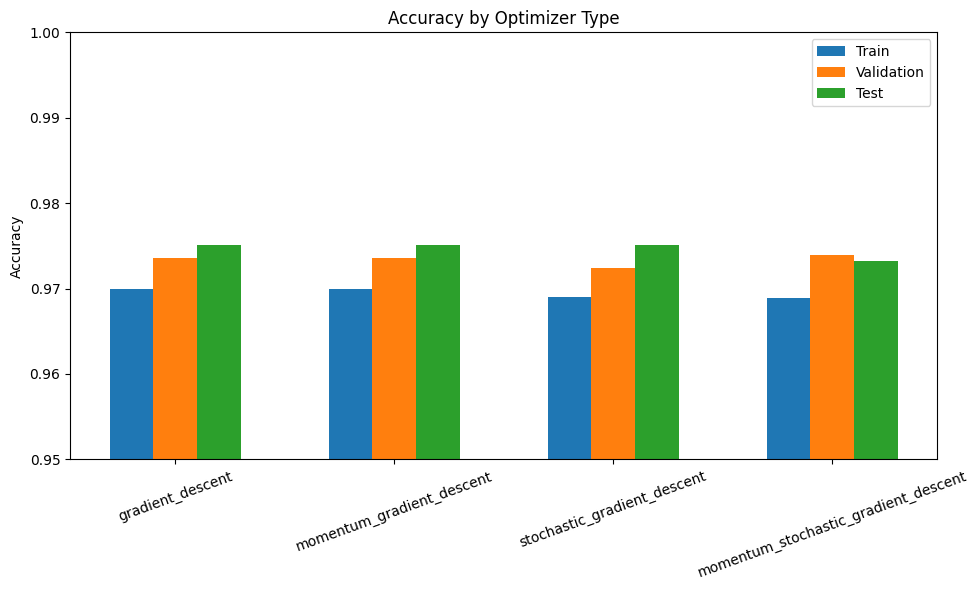

In [ ]:
# Loss functions to minimize
dataset_optimizer_types = [
  'gradient_descent',
  'momentum_gradient_descent',
  'stochastic_gradient_descent',
  'momentum_stochastic_gradient_descent'
]

# TODO: Select hyperparameters
dataset_alphas = [0.0001, 0.0001, 0.0001, 0.0001]

dataset_eta_decay_factors = [None, None, 0.05, 0.05]

dataset_betas = [None, 0.5, None, 0.5]

dataset_batch_sizes = [None, None, 32, 32]

dataset_Ts = [10000, 10000, 10000, 10000]

model_options = zip(dataset_optimizer_types, dataset_alphas, dataset_eta_decay_factors, dataset_betas, dataset_batch_sizes, dataset_Ts)

optimizers = []
train_accs = []
val_accs = []
test_accs = []

for optimizer_type, alpha, eta_decay_factor, beta, batch_size, T in model_options:

    # TODO: Initialize our logistic regression model
    model_ours = LogisticRegression()

    print('***** Results of our logistic regression model trained on {} dataset *****'.format('HTRU Pulsar'))
    print('\t optimizer_type={} \n\t alpha={} \n\t eta_decay_factor={} \n\t beta={} \n\t batch_size={} \n\t T={}'.format(
        optimizer_type, alpha, eta_decay_factor, beta, batch_size, T))
    print('')

    time_start = time.time()

    # TODO: Train model on training set
    model_ours.fit(X_train, y_train, T, alpha, eta_decay_factor, beta, batch_size, optimizer_type)

    time_elapsed = time.time() - time_start
    print('Total training time: {:3f} seconds'.format(time_elapsed))
    print('')

    # TODO: Score model using mean accuracy on training set
    predictions_train = model_ours.predict(X_train)
    score_train = np.mean(predictions_train == y_train)
    print('Training set mean accuracy: {:.4f}'.format(score_train))

    # TODO: Score model using mean accuracy on validation set
    predictions_val = model_ours.predict(X_val)
    score_val = np.mean(predictions_val == y_val)
    print('Validation set mean accuracy: {:.4f}'.format(score_val))

    # TODO: Score model using mean accuracy on testing set
    predictions_test = model_ours.predict(X_test)
    score_test = np.mean(predictions_test == y_test)
    print('Testing set mean accuracy: {:.4f}'.format(score_test))

    print('')

    # Collect data
    optimizers.append(optimizer_type)
    train_accs.append(score_train)
    val_accs.append(score_val)
    test_accs.append(score_test)

# Bar chart
x = range(len(optimizers))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar([i - width for i in x], train_accs, width=width, label='Train')
plt.bar(x, val_accs, width=width, label='Validation')
plt.bar([i + width for i in x], test_accs, width=width, label='Test')
plt.xticks(x, optimizers, rotation=20)
plt.ylabel('Accuracy')
plt.ylim(0.95, 1)
plt.title('Accuracy by Optimizer Type')
plt.legend()
plt.tight_layout()
plt.show()

Testing Hyperparameter Options with Only Stochastic Gradient Descents

Manual Implementation of Grid Search on 1000 Trials

In [ ]:
dataset_optimizer_types = [
  'stochastic_gradient_descent',
  'momentum_stochastic_gradient_descent'
]

LEARNING_RATE = [0.0001, 0.0005, 0.001, 0.005, 0.01]
DECAY_FACTOR = [0.1, 0.01, 0.001]
BETA = [0.5, 0.9, 0.99]
BATCH_SIZE = [16, 32, 64]
T = 1000

best_model = None
best_model_test_score = 0

for optimizer_type in dataset_optimizer_types:
  for learning_rate in LEARNING_RATE:
    for eta_decay_factor in DECAY_FACTOR:
      for beta in BETA:
        for batch_size in BATCH_SIZE:

          print('***** Results of our logistic regression model trained on {} dataset *****'.format('HTRU Pulsar'))
          print('\t optimizer_type={} \n\t alpha={} \n\t eta_decay_factor={} \n\t beta={} \n\t batch_size={} \n\t T={}'.format(
              optimizer_type, learning_rate, eta_decay_factor, beta, batch_size, T))
          print('')

          # TODO: Train model on training set
          model_ours.fit(X_train, y_train, T, alpha, eta_decay_factor, beta, batch_size, optimizer_type, display_loss=False)

          # TODO: Score model using mean accuracy on training set
          predictions_train = model_ours.predict(X_train)
          score_train = np.mean(predictions_train == y_train)
          print('Training set mean accuracy: {:.4f}'.format(score_train))

          # TODO: Score model using mean accuracy on validation set
          predictions_val = model_ours.predict(X_val)
          score_val = np.mean(predictions_val == y_val)
          print('Validation set mean accuracy: {:.4f}'.format(score_val))


          # TODO: Score model using mean accuracy on testing set
          predictions_test = model_ours.predict(X_test)
          score_test = np.mean(predictions_test == y_test)
          print('Testing set mean accuracy: {:.4f}'.format(score_test))

          if score_test > best_model_test_score:
            best_model = [learning_rate, eta_decay_factor, beta, batch_size]
            best_model_test_score = score_test

          print('')

print('Best Hyperparameter Settings: ', best_model)
print('Best Testing Accuracy: ', best_model_test_score)

***** Results of our logistic regression model trained on HTRU Pulsar dataset *****
	 optimizer_type=stochastic_gradient_descent 
	 alpha=0.0001 
	 eta_decay_factor=0.1 
	 beta=0.5 
	 batch_size=16 
	 T=1000

Training set mean accuracy: 0.9588
Validation set mean accuracy: 0.9642
Testing set mean accuracy: 0.9564

***** Results of our logistic regression model trained on HTRU Pulsar dataset *****
	 optimizer_type=stochastic_gradient_descent 
	 alpha=0.0001 
	 eta_decay_factor=0.1 
	 beta=0.5 
	 batch_size=32 
	 T=1000

Training set mean accuracy: 0.9572
Validation set mean accuracy: 0.9624
Testing set mean accuracy: 0.9549

***** Results of our logistic regression model trained on HTRU Pulsar dataset *****
	 optimizer_type=stochastic_gradient_descent 
	 alpha=0.0001 
	 eta_decay_factor=0.1 
	 beta=0.5 
	 batch_size=64 
	 T=1000

Training set mean accuracy: 0.9588
Validation set mean accuracy: 0.9642
Testing set mean accuracy: 0.9557

***** Results of our logistic regression model train

Testing Optimal Hyperpameter Setup for Variable Number of Trials

In [ ]:
LEARNING_RATE = best_model[0]
DECAY_FACTOR = best_model[1]
BETA = best_model[2]
BATCH_SIZE = best_model[3]
T = [1000, 5000, 10000, 20000]

best_model = None
best_trials = 0
best_model_test_score = 0

for optimizer_type in dataset_optimizer_types:
  for trials in T:
    print('***** Results of our logistic regression model trained on {} dataset over {} trials *****'.format('HTRU Pulsar', trials))
    print('')

    # TODO: Train model on training set
    model_ours = LogisticRegression()
    model_ours.fit(X_train, y_train, trials, LEARNING_RATE, DECAY_FACTOR, BETA, BATCH_SIZE, optimizer_type, display_loss=False)

    # TODO: Score model using mean accuracy on training set
    predictions_train = model_ours.predict(X_train)
    score_train = np.mean(predictions_train == y_train)
    print('Training set mean accuracy: {:.4f}'.format(score_train))

    # TODO: Score model using mean accuracy on validation set
    predictions_val = model_ours.predict(X_val)
    score_val = np.mean(predictions_val == y_val)
    print('Validation set mean accuracy: {:.4f}'.format(score_val))

    # TODO: Score model using mean accuracy on testing set
    predictions_test = model_ours.predict(X_test)
    score_test = np.mean(predictions_test == y_test)
    print('Testing set mean accuracy: {:.4f}'.format(score_test))

    if score_test > best_model_test_score:
      best_model = model_ours
      best_trials = trials
      best_model_test_score = score_test

    print('')

print('Best Time Frame: ', best_trials)
print('Best Testing Accuracy: ', best_model_test_score)

***** Results of our logistic regression model trained on HTRU Pulsar dataset over 1000 trials *****



<ipython-input-119-8351ed5277cb>:114: RuntimeWarning: overflow encountered in exp
  loss = np.mean(np.log(1 + np.exp(-y * y_hat)))
<ipython-input-118-e39ccd3942fc>:48: RuntimeWarning: overflow encountered in exp
  gradient = -(np.matmul(x, (y / (1 + np.exp(y * y_hat))).T) / x.shape[1])
<ipython-input-119-8351ed5277cb>:78: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-np.matmul(self.__weights.T, x)))


Training set mean accuracy: 0.9658
Validation set mean accuracy: 0.9657
Testing set mean accuracy: 0.9672

***** Results of our logistic regression model trained on HTRU Pulsar dataset over 5000 trials *****

Training set mean accuracy: 0.9679
Validation set mean accuracy: 0.9706
Testing set mean accuracy: 0.9739

***** Results of our logistic regression model trained on HTRU Pulsar dataset over 10000 trials *****

Training set mean accuracy: 0.9558
Validation set mean accuracy: 0.9538
Testing set mean accuracy: 0.9594

***** Results of our logistic regression model trained on HTRU Pulsar dataset over 20000 trials *****

Training set mean accuracy: 0.9743
Validation set mean accuracy: 0.9777
Testing set mean accuracy: 0.9791

***** Results of our logistic regression model trained on HTRU Pulsar dataset over 1000 trials *****

Training set mean accuracy: 0.9651
Validation set mean accuracy: 0.9624
Testing set mean accuracy: 0.9672

***** Results of our logistic regression model trained 

Visualizing Results with ROC Curve and Confusion Matrix

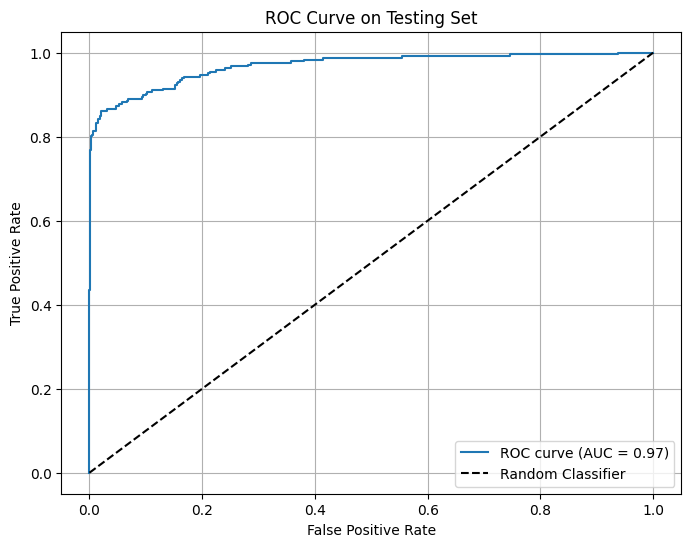

In [ ]:
# Get predicted probabilities for positive class
probs_test = model_ours.predict_proba(X_test)
probs_test = probs_test[0]

# NOTE: You must convert labels from {-1, 1} to {0, 1} for sklearn
y_test_binary = (y_test == 1).astype(int)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary.flatten(), probs_test.flatten())
auc = roc_auc_score(y_test_binary.flatten(), probs_test.flatten())

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Testing Set')
plt.legend()
plt.grid(True)
plt.show()

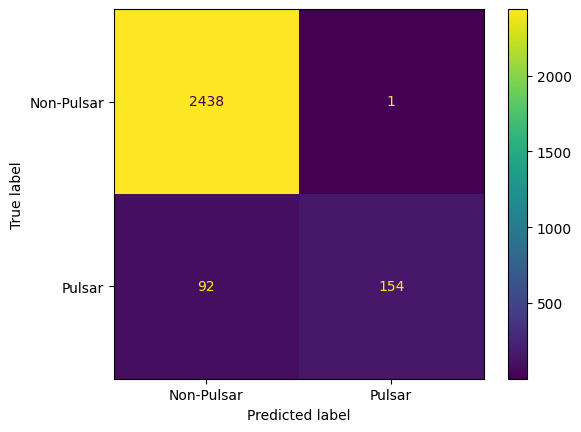

In [ ]:
# TODO: Create a confusion matrix of the validation predictions using skmetrics.confusion_matrix
predictions_test = model_ours.predict(X_test)
predictions_test = predictions_test[0]
predictions_test = predictions_test.reshape(1, -1)
confusion_matrix = skmetrics.confusion_matrix(y_test.flatten(), predictions_test.flatten())

# TODO: Create a visualization of the confusion matrix using skmetrics.ConfusionMatrixDisplay
confusion_matrix_plot = skmetrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=['Non-Pulsar', 'Pulsar'])

# TODO: Display the confusion matrix using the plot function
confusion_matrix_plot.plot()